In [548]:
# Importación de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import Image
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from matplotlib import lines
from matplotlib import patches
from matplotlib.patches import FancyArrowPatch
from matplotlib.patheffects import withStroke
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext
from skimage import io
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib import font_manager

In [220]:
# Carga del dataframe 2024
try:
    df_2024 = pd.read_csv(r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\02_Visualizacion\02_Data\ArchivoMatr_Adm2024.csv', sep=';',decimal=',')
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


In [221]:
df_2024.head()

,ID_aux,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA
0,id_690126976014,51,51111,1,1,709.90,1
1,id_831408370144,18,18075,1,1,713.45,1
2,id_752607579265,44,44049,1,1,876.10,1
3,id_772307770236,21,21043,1,1,643.30,2
4,id_481904877199,41,41067,1,1,638.70,1


In [222]:
# Verificar tipos de datos
df_2024.head()
print(df_2024.dtypes)

ID_aux             object
CODIGO_UNIV         int64
CODIGO              int64
VIA                 int64
PREFERENCIA         int64
PTJE_POND         float64
TIPO_MATRICULA      int64
dtype: object


In [223]:
# Convertir todas las columnas de tipo int64 a object
df_2024= df_2024.astype({col: 'object' for col in df_2024.select_dtypes(include='int64').columns})

# Verificar los tipos de datos después de la conversión
print(df_2024.dtypes)


ID_aux             object
CODIGO_UNIV        object
CODIGO             object
VIA                object
PREFERENCIA        object
PTJE_POND         float64
TIPO_MATRICULA     object
dtype: object


In [224]:
df_2024.describe()

,PTJE_POND
count,118359.000000
mean,693.865317
std,152.805557
min,0.000000
25%,630.200000
50%,701.700000
75%,781.000000
max,1095.000000


In [225]:
df_2024 = df_2024[df_2024['PTJE_POND'] != 0]
# Normalización min-max entre 0 y 1
df_2024['PTJE_POND_normalizado_minmax'] = (df_2024['PTJE_POND'] - df_2024['PTJE_POND'].min()) / (df_2024['PTJE_POND'].max() - df_2024['PTJE_POND'].min())
df_2024.describe()

,PTJE_POND,PTJE_POND_normalizado_minmax
count,115353.000000,115353.000000
mean,711.946851,0.492174
std,105.284423,0.139579
min,340.700000,0.000000
25%,635.850000,0.391290
50%,705.500000,0.483627
75%,783.400000,0.586902
max,1095.000000,1.000000


In [196]:
print(df_2024.isnull().sum())

ID_aux                          0
CODIGO_UNIV                     0
CODIGO                          0
VIA                             0
PREFERENCIA                     0
PTJE_POND                       0
TIPO_MATRICULA                  0
PTJE_POND_normalizado_minmax    0
dtype: int64


In [197]:
# Carga del dataframe N_1
try:
    df_2014 = pd.read_csv(r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\02_Visualizacion\02_Data\ArchivoMat_Adm2014.csv', sep=';',decimal=',')
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

In [198]:
# Verificar tipos de datos
df_2014.head()



,ID_aux,CODIGO_UNIV,VIA,CODIGO,PREFERENCIA,PTJE_POND,POND_ANYO_ACAD,TIPO_MATRICULA
0,id_484743836,39,1,39103,1,508.88,1,1
1,id_3193341220,42,1,42001,2,648.00,1,1
2,id_9277942157,24,1,24067,2,615.80,1,1
3,id_819608175963,16,1,16045,1,683.40,1,1
4,id_784407879445,33,1,33160,1,544.10,1,1


In [199]:
# Normalización min-max entre 0 y 1
df_2014['PTJE_POND_normalizado_minmax'] = (df_2014['PTJE_POND'] - df_2014['PTJE_POND'].min()) / (df_2014['PTJE_POND'].max() - df_2014['PTJE_POND'].min())

In [200]:
print(df_2014.dtypes)

ID_aux                           object
CODIGO_UNIV                       int64
VIA                               int64
CODIGO                            int64
PREFERENCIA                       int64
PTJE_POND                       float64
POND_ANYO_ACAD                    int64
TIPO_MATRICULA                    int64
PTJE_POND_normalizado_minmax    float64
dtype: object


In [201]:
# Convertir todas las columnas de tipo int64 a object en df_2014
df_2014 = df_2014.astype({col: 'object' for col in df_2014.select_dtypes(include='int64').columns})

# Verificar los tipos de datos después de la conversión
print(df_2014.dtypes)


ID_aux                           object
CODIGO_UNIV                      object
VIA                              object
CODIGO                           object
PREFERENCIA                      object
PTJE_POND                       float64
POND_ANYO_ACAD                   object
TIPO_MATRICULA                   object
PTJE_POND_normalizado_minmax    float64
dtype: object


In [202]:
df_2014.describe()


,PTJE_POND,PTJE_POND_normalizado_minmax
count,77297.000000,77297.000000
mean,612.017763,0.481867
std,70.119367,0.159290
min,399.900000,0.000000
25%,559.650000,0.362903
50%,608.600000,0.474103
75%,660.700000,0.592458
max,840.100000,1.000000


In [203]:
# Carga del dataframe desde la hoja "Anexo - Oferta académica"
# Cargar el archivo Excel
excel_file = pd.ExcelFile(r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\02_Visualizacion\02_Data\Libro_CódigosADM2024_ArchivoD.xlsx')
print(excel_file.sheet_names)

try:
    df_anexo = pd.read_excel(excel_file, sheet_name='Anexo -  Oferta académica')
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")
    


['Postulación y Selección', 'Anexo -  Estado Preferencia', 'Anexo -  Oferta académica']


In [204]:
print(df_anexo.head())

   CODIGO_CARRERA  UNI_CODIGO                                 NOMBRE_CARRERA  \
0           11001          11                                   ARQUITECTURA   
1           11003          11                             ACTUACIÃ“N TEATRAL   
2           11004          11                                DISEÃ‘O TEATRAL   
3           11005          11                                        DISEÃ‘O   
4           11011          11  ARTES VISUALES, LIC. EN ARTES CON MENCIÃ“N EN   

     NOMBRE_UNIVERSIDAD  REGION_CASA_MATRIZ  %_NOTAS  %_Ranking  %_LENG  \
0  UNIVERSIDAD DE CHILE                  13       10         20      20   
1  UNIVERSIDAD DE CHILE                  13       10         10      10   
2  UNIVERSIDAD DE CHILE                  13       10         20      25   
3  UNIVERSIDAD DE CHILE                  13       10         30      25   
4  UNIVERSIDAD DE CHILE                  13       10         20      35   

   %_MATE1  %_MATE2  ...  CDP_VACANTES_ESPECIALES  CAR_PEDAGOGIA CAR

In [205]:
column_names = df_anexo.columns.tolist()
print(column_names)

['CODIGO_CARRERA', 'UNI_CODIGO', 'NOMBRE_CARRERA', 'NOMBRE_UNIVERSIDAD', 'REGION_CASA_MATRIZ', '%_NOTAS', '%_Ranking', '%_LENG', '%_MATE1', '%_MATE2', '%_HYCS', '%_CIEN', 'EXIGE_MATE2', 'PROM_MINIMO_LENMAT', 'PONDERADO_MINIMO', 'VACANTES_1SEM', 'SC_1S', 'VACANTES_2SEM', 'SC_2S', 'RESTRINGE_SEXO', 'PRUEBA_ESPECIAL', 'TIPO_PE', 'PONDERACION_PE', 'PO_ALTERNATIVA', 'MAX_POST_UNIV', 'EXCLUYE_DESDE_PREFERENCIA', 'CDP_VACANTES_ESPECIALES', 'CAR_PEDAGOGIA', 'CAR_MIN_RKG', 'CAR_SEL_PEDA', 'PACE', 'CAR_VACANTES_PACE', 'REG_CODIGO', 'VACANTES_GENERO', 'IMPARTIDO_ANTES_2019', 'ACREDITADA_3AHNOS']


In [206]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['%_NOTAS', '%_Ranking', '%_LENG', '%_MATE1', '%_MATE2', '%_HYCS', '%_CIEN', 'EXIGE_MATE2', 'PROM_MINIMO_LENMAT', 'PONDERADO_MINIMO', 'VACANTES_1SEM', 'SC_1S', 'VACANTES_2SEM', 'SC_2S', 'RESTRINGE_SEXO', 'PRUEBA_ESPECIAL', 'TIPO_PE', 'PONDERACION_PE', 'PO_ALTERNATIVA', 'MAX_POST_UNIV', 'EXCLUYE_DESDE_PREFERENCIA', 'CDP_VACANTES_ESPECIALES', 'CAR_PEDAGOGIA', 'CAR_MIN_RKG', 'CAR_SEL_PEDA', 'PACE', 'CAR_VACANTES_PACE', 'VACANTES_GENERO']

# Eliminar las columnas del DataFrame
df_anexo = df_anexo.drop(columns=columnas_a_eliminar)

# Verificar las columnas restantes
print(df_anexo.columns)

Index(['CODIGO_CARRERA', 'UNI_CODIGO', 'NOMBRE_CARRERA', 'NOMBRE_UNIVERSIDAD',
       'REGION_CASA_MATRIZ', 'REG_CODIGO', 'IMPARTIDO_ANTES_2019',
       'ACREDITADA_3AHNOS'],
      dtype='object')


In [207]:
print(df_anexo.dtypes)

CODIGO_CARRERA           int64
UNI_CODIGO               int64
NOMBRE_CARRERA          object
NOMBRE_UNIVERSIDAD      object
REGION_CASA_MATRIZ       int64
REG_CODIGO               int64
IMPARTIDO_ANTES_2019    object
ACREDITADA_3AHNOS       object
dtype: object


In [208]:

# Lista de columnas de tipo int64 que quieres convertir a object
columnas_int64 = [
    'CODIGO_CARRERA', 'UNI_CODIGO', 'REGION_CASA_MATRIZ', 'REG_CODIGO'
]

# Convertir las columnas de tipo int64 a object
df_anexo[ columnas_int64 ] = df_anexo[ columnas_int64 ].astype('object')

# Verificar los tipos de datos después de la conversión
print(df_anexo.dtypes)


CODIGO_CARRERA          object
UNI_CODIGO              object
NOMBRE_CARRERA          object
NOMBRE_UNIVERSIDAD      object
REGION_CASA_MATRIZ      object
REG_CODIGO              object
IMPARTIDO_ANTES_2019    object
ACREDITADA_3AHNOS       object
dtype: object


In [209]:
# Seleccionar columnas de tipo object
print(df_anexo['NOMBRE_UNIVERSIDAD'].unique())


['UNIVERSIDAD DE CHILE' 'PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE'
 'UNIVERSIDAD DE CONCEPCION'
 'PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO'
 'UNIVERSIDAD TECNICA FEDERICO SANTA MARIA'
 'UNIVERSIDAD DE SANTIAGO DE CHILE' 'UNIVERSIDAD AUSTRAL DE CHILE'
 'UNIVERSIDAD CATOLICA DEL NORTE' 'UNIVERSIDAD DE VALPARAISO'
 'UNIVERSIDAD METROPOLITANA DE CIENCIAS DE LA EDUCACION'
 'UNIVERSIDAD TECNOLOGICA METROPOLITANA' 'UNIVERSIDAD DE TARAPACA'
 'UNIVERSIDAD ARTURO PRAT' 'UNIVERSIDAD DE ANTOFAGASTA'
 'UNIVERSIDAD DE LA SERENA' 'UNIVERSIDAD DE PLAYA ANCHA '
 'UNIVERSIDAD DE ATACAMA' 'UNIVERSIDAD DEL BIO-BIO'
 'UNIVERSIDAD DE LA FRONTERA' 'UNIVERSIDAD DE LOS LAGOS'
 'UNIVERSIDAD DE MAGALLANES' 'UNIVERSIDAD DE TALCA'
 'UNIVERSIDAD CATOLICA DEL MAULE'
 'UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION'
 'UNIVERSIDAD CATOLICA DE TEMUCO' 'UNIVERSIDAD DIEGO PORTALES'
 'UNIVERSIDAD MAYOR' 'UNIVERSIDAD FINIS TERRAE' 'UNIVERSIDAD ANDRES BELLO'
 'UNIVERSIDAD ADOLFO IBAÃ‘EZ' 'UNIVERSIDAD DE LOS ANDES'
 'U

In [210]:
# Crear un diccionario con el ranking CWUR
ranking_cwur = {
    'PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE': 1,
    'UNIVERSIDAD DE CHILE': 1,
    'UNIVERSIDAD DE SANTIAGO DE CHILE': 1,
    'UNIVERSIDAD ADOLFO IBAÑEZ': 1,
    'UNIVERSIDAD DE CONCEPCION': 1
}

# Crear la columna binaria: 1 si está en el ranking, 0 si no
df_anexo['EN_RANKING_CWUR'] = df_anexo['NOMBRE_UNIVERSIDAD'].map(lambda x: 1 if x in ranking_cwur else 0)

In [211]:
print(df_anexo.dtypes)

CODIGO_CARRERA          object
UNI_CODIGO              object
NOMBRE_CARRERA          object
NOMBRE_UNIVERSIDAD      object
REGION_CASA_MATRIZ      object
REG_CODIGO              object
IMPARTIDO_ANTES_2019    object
ACREDITADA_3AHNOS       object
EN_RANKING_CWUR          int64
dtype: object


In [212]:
# Supongamos que ya tienes los dataframes DF y DF_anexo cargados
# Realizar la unión (merge) de los dataframes
df_merged_2024 = pd.merge(df_2024, df_anexo, left_on='CODIGO', right_on='CODIGO_CARRERA', how='inner')
df_merged_2014 = pd.merge(df_2014, df_anexo, left_on='CODIGO', right_on='CODIGO_CARRERA', how='inner')

In [213]:
column_names = df_merged_2024.columns.tolist()
print(column_names)

['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'VIA', 'PREFERENCIA', 'PTJE_POND', 'TIPO_MATRICULA', 'PTJE_POND_normalizado_minmax', 'CODIGO_CARRERA', 'UNI_CODIGO', 'NOMBRE_CARRERA', 'NOMBRE_UNIVERSIDAD', 'REGION_CASA_MATRIZ', 'REG_CODIGO', 'IMPARTIDO_ANTES_2019', 'ACREDITADA_3AHNOS', 'EN_RANKING_CWUR']


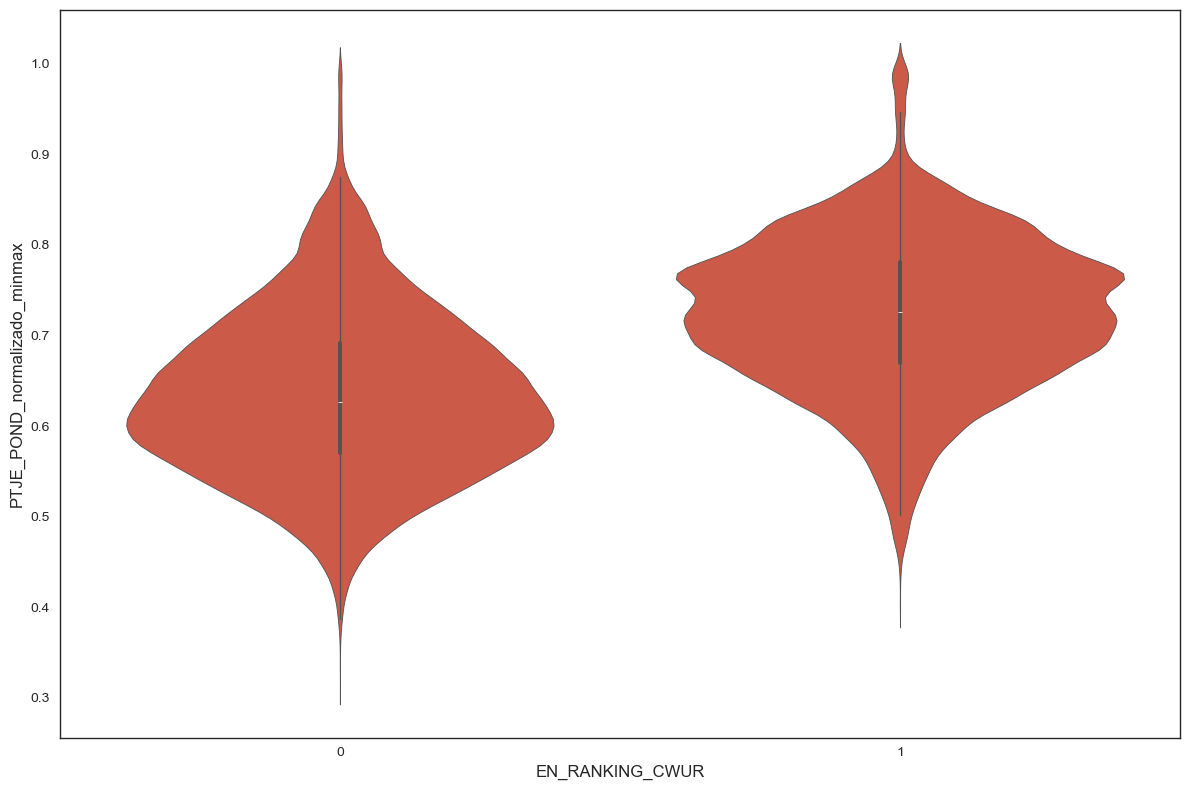

In [234]:
# Grafico
plt.figure(figsize=(12, 8))
sns.violinplot(
    x="EN_RANKING_CWUR",
    y="PTJE_POND_normalizado_minmax",
    data=df_merged_2024,
)
# Titulo
fig.suptitle(f'Distribución de PTJE_POND (2024) - Variación entre categorías: {variacion_porcentual_2024:.2f}%' if variacion_porcentual_2024 is not None else 'Variación no disponible', fontsize=16)
ax.set_title('asdasdas', fontsize=16, loc='left')
# Formato
sns.set_style("white")
plt.rcParams['axes.grid'] = False  # Desactivar la cuadrícula
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.5, 1])
# Crear la leyenda
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color='Blue', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color='Blue'))

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()

#  Spine
ax.spines['left'].set_edgecolor('white') 
ax.spines['right'].set_edgecolor('white') 
ax.spines['top'].set_edgecolor('white') 
plt.show()



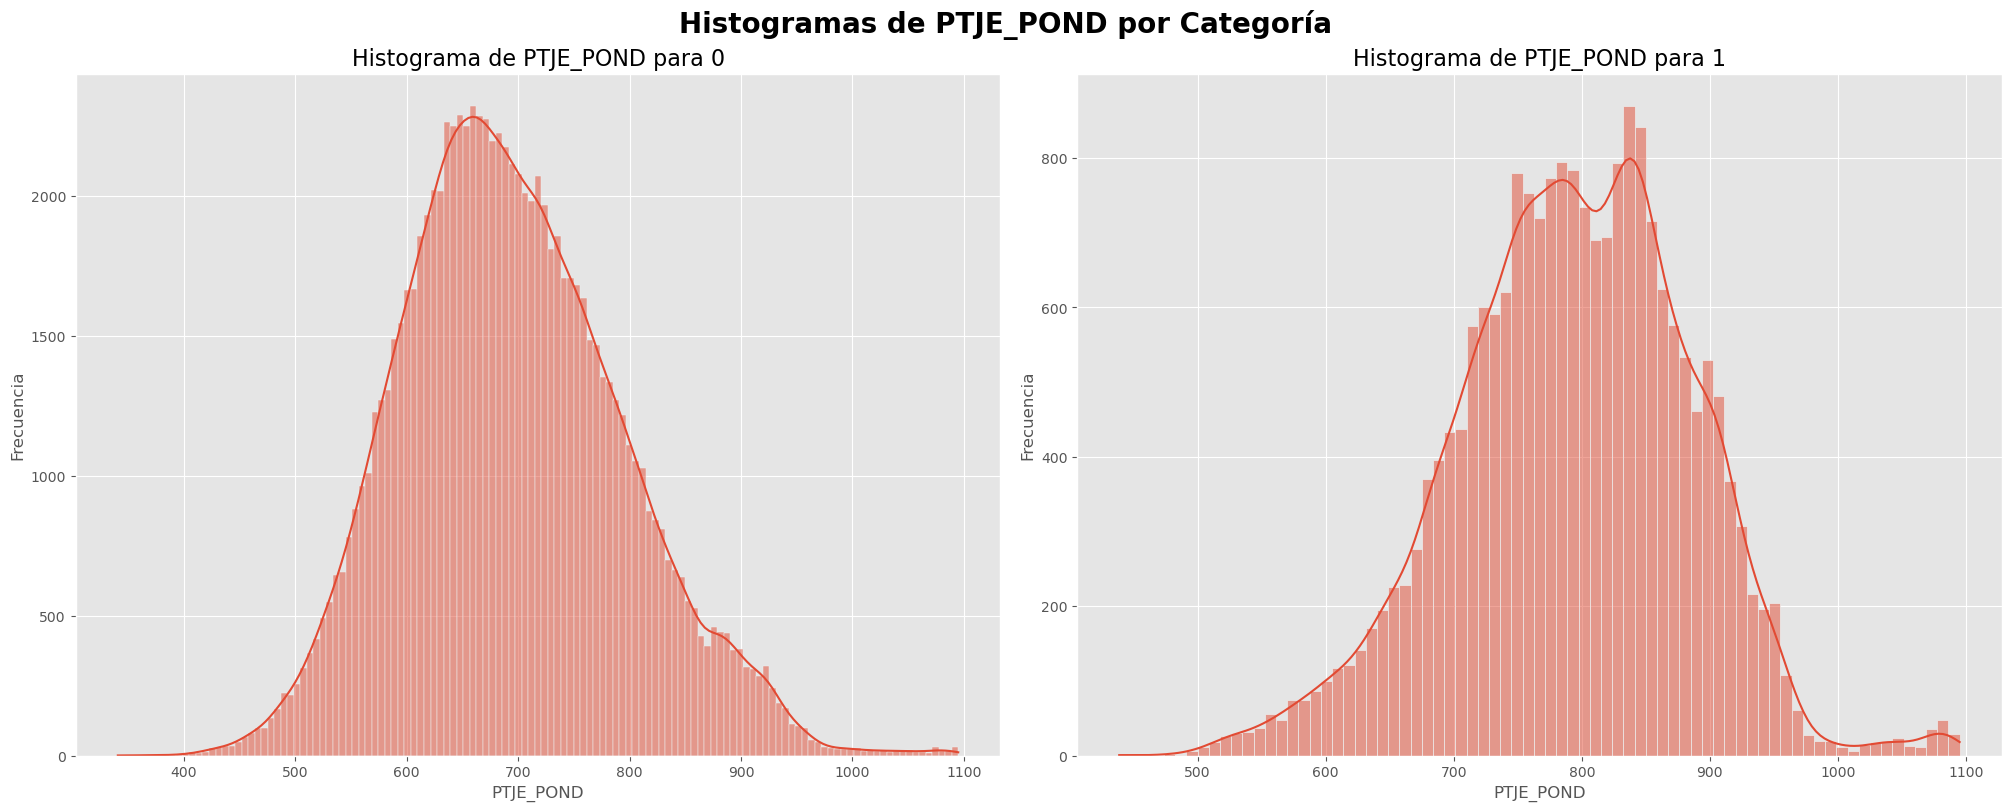

In [30]:
# Supongamos que tu DataFrame se llama df


# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), constrained_layout=True)

# Lista de categorías
categorias = df_merged['EN_RANKING_CWUR'].unique()

# Iterar sobre las categorías y crear un histograma para cada una
for i, categoria in enumerate(categorias):
    sns.histplot(data=df_merged[df_merged['EN_RANKING_CWUR'] == categoria], x='PTJE_POND', kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de PTJE_POND para {categoria}', fontsize=16)
    axes[i].set_xlabel('PTJE_POND', fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)

plt.suptitle('Histogramas de PTJE_POND por Categoría', size=20, weight='bold')
plt.show()

C:\Users\csolis\AppData\Local\Temp\ipykernel_26280\2882377387.py:149: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


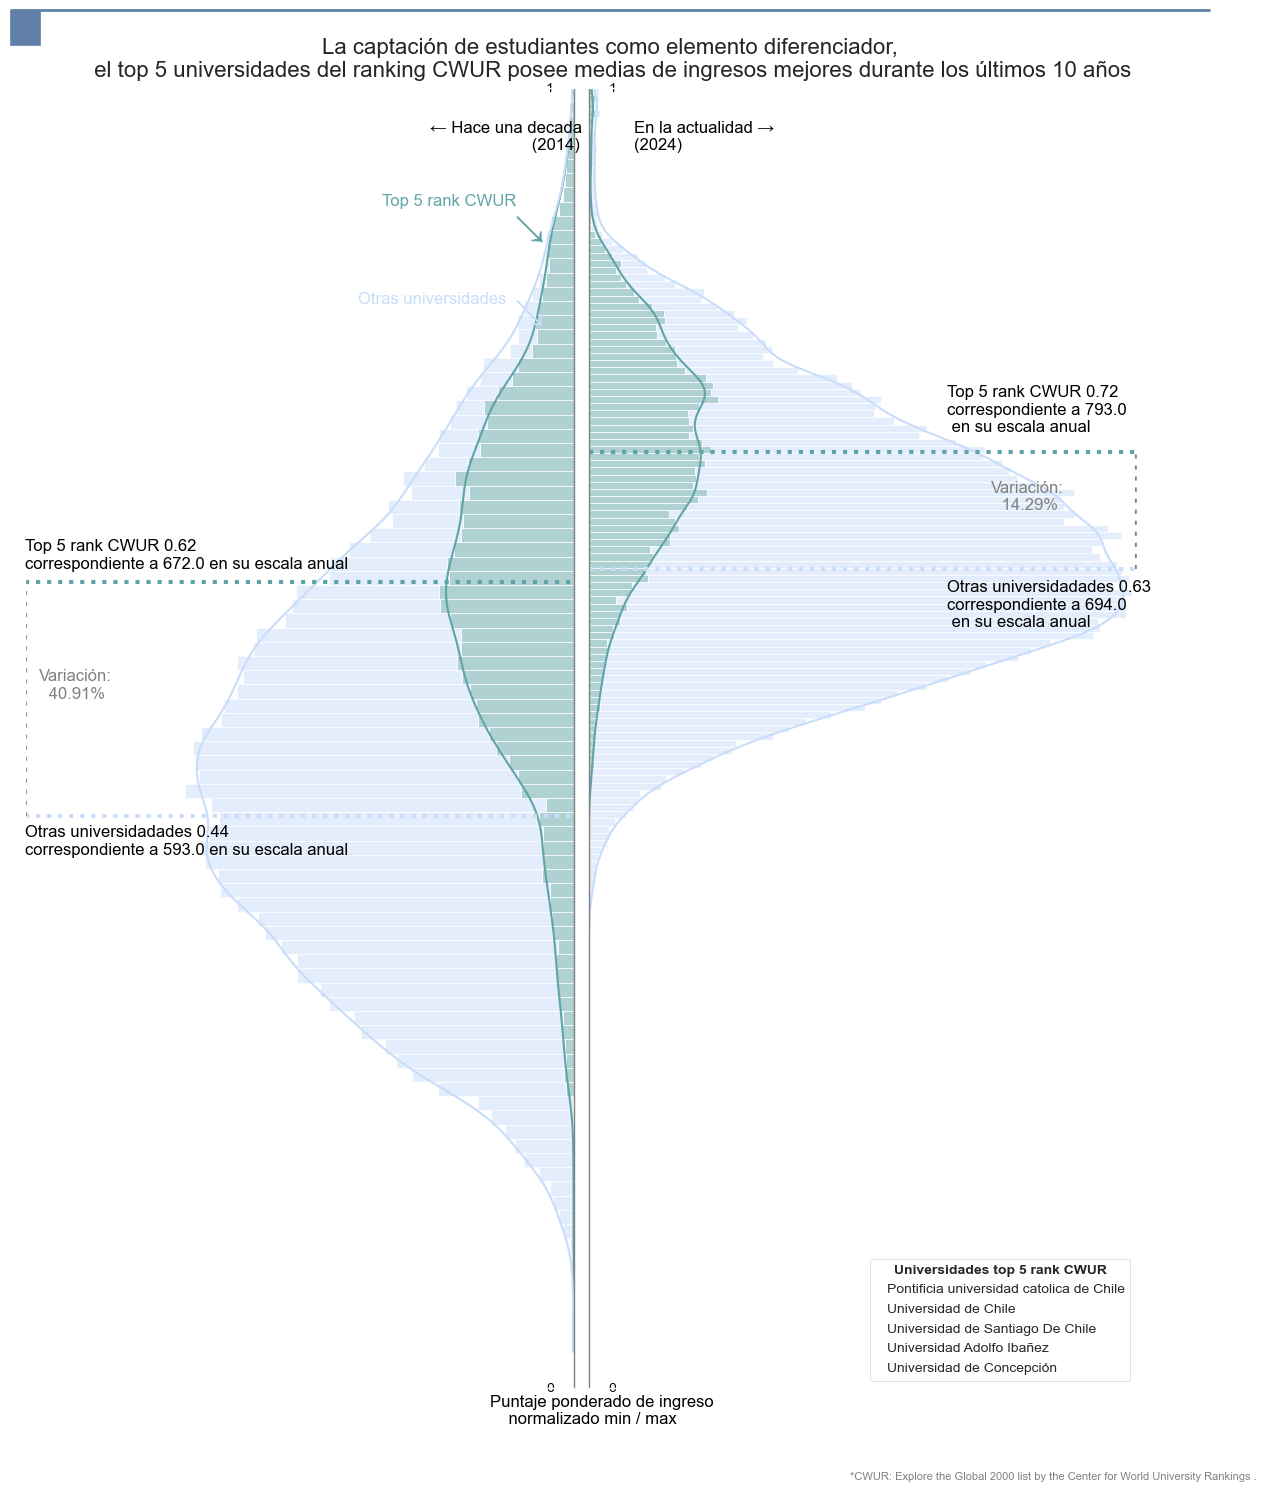

In [561]:

# Paleta de colores
pallete = [('#C8DDFA'),('#60A4A7')]
Rank_0 = ('#C8DDFA')
Rank_1 = ('#60A4A7')

# Estadisticos
# Calcular las medias para cada categoría en 2014
medias_2014 = df_merged_2014.groupby('EN_RANKING_CWUR')['PTJE_POND_normalizado_minmax'].mean()
medias_2014_real = df_merged_2014.groupby('EN_RANKING_CWUR')['PTJE_POND'].mean()
media_0_2014 = round(medias_2014.get(0, 0), 2)
media_1_2014 = round(medias_2014.get(1, 0), 2)
media_0_2014_real = round(medias_2014_real.get(0, 0), 0)
media_1_2014_real = round(medias_2014_real.get(1, 0), 0)
#Verificación de factibilidad
if media_0_2014 is not None and media_1_2014 is not None and media_0_2014 != 0:
    variacion_porcentual_2014 = ((media_1_2014 - media_0_2014) / media_0_2014) * 100
else:
    variacion_porcentual_2014 = None  # No se puede calcular
# Calcular las medias para cada categoría en 2024
medias_2024 = df_merged_2024.groupby('EN_RANKING_CWUR')['PTJE_POND_normalizado_minmax'].mean()
medias_2024_real = df_merged_2024.groupby('EN_RANKING_CWUR')['PTJE_POND'].mean()
media_0_2024 = round(medias_2024.get(0, 0), 2)
media_1_2024 = round(medias_2024.get(1, 0), 2)
media_0_2024_real = round(medias_2024_real.get(0, 0), 0)
media_1_2024_real = round(medias_2024_real.get(1, 0), 0)
#Verificación de factibilidad
if media_0_2024 is not None and media_1_2024 is not None and media_0_2024 != 0:
    variacion_porcentual_2024 = ((media_1_2024 - media_0_2024) / media_0_2024) * 100
else:
    variacion_porcentual_2024 = None  # No se puede calcular
# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 14), constrained_layout=True)
# Grafico_N1: Lado 2014
sns.histplot(data=df_merged_2014,
             y='PTJE_POND_normalizado_minmax',
             hue='EN_RANKING_CWUR',
             kde=True,
             multiple='stack',
             legend=False,
             palette=pallete,
             ax=axes[0])

# Formato y título
sns.set_style("white")
plt.rcParams['axes.grid'] = False
fig.suptitle(f'La captación de estudiantes como elemento diferenciador,\n el top 5 universidades del ranking CWUR posee medias de ingresos mejores durante los últimos 10 años', fontsize=16)
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=2, color='#6080A7', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.025, 0.025, color='#6080A7'))
# Eje Y: titulo, limites, ticks y anotaciones
axes[0].set_ylabel('')
axes[0].yaxis.set_label_position("right")
axes[0].tick_params(axis='y', direction='in', length=6, width=1.5, colors='black', pad=-20, zorder=5)
axes[0].tick_params(axis='y', which='major', length=0)
axes[0].set_ylim(0, 1)
axes[0].set_yticks([0, 1])
axes[0].yaxis.tick_right()
axes[0].yaxis.set_label_position("right")
axes[0].yaxis.tick_right()

# Eje X: titulo, limites, ticks y anotaciones
axes[0].set_xlabel('') 
axes[0].invert_xaxis()
axes[0].set_xticks([])
axes[0].set_xlim(2600,0)

# Lineas de referencia estadistica
axes[0].axhline(media_0_2014, linestyle='dotted', linewidth=3,color=Rank_0) 
axes[0].text(axes[0].get_xlim()[0] - 0.9, media_0_2014- 0.03, f'Otras universidadades {media_0_2014}\ncorrespondiente a {media_0_2014_real} en su escala anual', 
            ha='left', fontsize=12, color='black', rotation=0)  
axes[0].axhline(media_1_2014, linestyle='dotted', linewidth=3, color=Rank_1)  
axes[0].text(axes[0].get_xlim()[0] - 0.9, media_1_2014+ 0.01, f'Top 5 rank CWUR {media_1_2014}\ncorrespondiente a {media_1_2014_real} en su escala anual', 
            ha='left', fontsize=12, color='black', rotation=0)  
pos_y_variacion = (media_0_2014 + media_1_2014) / 2  
axes[0].vlines(x=axes[0].get_xlim()[0] - 0.5, ymin=min(media_0_2014, media_1_2014), ymax=max(media_0_2014, media_1_2014), 
               colors='grey', linestyle='dotted', linewidth=3)
axes[0].text(((axes[0].get_xlim()[0] + axes[0].get_xlim()[1]) / 1.1),pos_y_variacion,
    f'Variación:\n {variacion_porcentual_2014:.2f}%', 
    ha='center', fontsize=12, color='grey')
# Spines
axes[0].spines['right'].set_edgecolor('grey') 
axes[0].spines['left'].set_edgecolor('white') 
axes[0].spines['top'].set_edgecolor('white') 
axes[0].spines['bottom'].set_edgecolor('white') 

# Grafico_N2: Lado 2024
sns.histplot(data=df_merged_2024,
             y='PTJE_POND_normalizado_minmax',
             hue='EN_RANKING_CWUR',
             kde=True,
             multiple='stack',
             palette=pallete,
             ax=axes[1])


# Eje Y: titulo, limites, ticks y anotaciones
axes[1].set_ylabel('')
axes[1].set_ylim(0, 1)
axes[1].set_yticks([0, 1])
axes[1].yaxis.set_label_position("left")
axes[1].yaxis.tick_left()  # Cambiar a tick_left para que los ticks estén a la izquierda
axes[1].tick_params(axis='y', direction='in', length=6, width=1.5, colors='black', pad=-20, zorder=5)
axes[1].tick_params(axis='y', which='major', length=0)
# Eje X: titulo, limites, ticks y anotaciones
axes[1].set_xlabel('') 
axes[1].set_xticks([])
axes[1].set_xlim(0,2600)

# Lineas de referencia estadistica
axes[1].axhline(media_0_2024, linestyle='dotted', linewidth=3, color=Rank_0) 
axes[1].text(axes[1].get_xlim()[1] - 900, media_0_2024 - 0.045, f'Otras universidadades {media_0_2024}\ncorrespondiente a {media_0_2024_real}\n en su escala anual', 
             ha='left', fontsize=12, color='black', rotation=0)  
axes[1].axhline(media_1_2024, linestyle='dotted', linewidth=3,color=Rank_1)  
axes[1].text(axes[1].get_xlim()[1] - 900, media_1_2024+ 0.015, f'Top 5 rank CWUR {media_1_2024}\ncorrespondiente a {media_1_2024_real}\n en su escala anual', 
            ha='left', fontsize=12, color='black', rotation=0)  
pos_y_variacion = (media_0_2024 + media_1_2024) / 2  
axes[1].vlines(x=axes[1].get_xlim()[1] + 0.5, ymin=min(media_0_2024, media_1_2024), ymax=max(media_0_2024, media_1_2024), 
               colors='grey', linestyle='dotted', linewidth=3)
axes[1].text(((axes[1].get_xlim()[1] + axes[1].get_xlim()[1]) / 2.5),pos_y_variacion,
    f'Variación:\n {variacion_porcentual_2024:.2f}%', 
    ha='center', fontsize=12, color='grey')

# Ajustar la leyenda a la parte inferior derecha del gráfico
labels = ['Pontificia universidad catolica de Chile',
          'Universidad de Chile',
          'Universidad de Santiago De Chile',
          'Universidad Adolfo Ibañez',
          'Universidad de Concepción']
font_bold = font_manager.FontProperties(weight='bold', size=10)

# Configurar la leyenda
axes[1].legend(labels, title='Universidades top 5 rank CWUR', 
               loc='lower right', fontsize=10, handlelength=0, 
               title_fontproperties=font_bold)
# Spines
axes[1].spines['left'].set_edgecolor('grey') 
axes[1].spines['right'].set_edgecolor('white') 
axes[1].spines['top'].set_edgecolor('white') 
axes[1].spines['bottom'].set_edgecolor('white') 

# Anotaciones finales
fig.text(0.40, -0.01,'Puntaje ponderado de ingreso\n    normalizado min / max', fontsize=12, color='black')
fig.text(0.35, 0.90,'← Hace una decada\n                      (2014)', fontsize=12, color='black')
fig.text(0.52, 0.90,'En la actualidad →\n(2024)', fontsize=12, color='black')
fig.text(0.41, 0.77,'→', fontsize=28, color=Rank_0, rotation = -45)
fig.text(0.29, 0.79,'Otras universidades', fontsize=12, color=Rank_0)
fig.text(0.41, 0.83,'→', fontsize=28, color=Rank_1, rotation = -45)
fig.text(0.31, 0.86,'Top 5 rank CWUR', fontsize=12, color=Rank_1)
fig.text(0.7, -0.05,'*CWUR: Explore the Global 2000 list by the Center for World University Rankings .', fontsize=8, color='grey')
plt.tight_layout()
plt.show()